In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.drop(13, 1)
#y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
#y = np.where(y > 0, 0, 1)

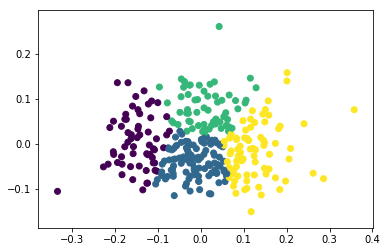

Comparing k-means clusters against the data:


Exception: Data must be 1-dimensional

In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
km = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km)
plt.show()
X_pca.ravel()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, X_pca))

In [5]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
%timeit predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, km))

252 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3
row_0                
0       0  14   0  47
1       0   0  31  28
2       1  84  29   1
3      60   6   2   0


In [ ]:
km.labels_

In [6]:
# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

30.9 ms ± 3.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


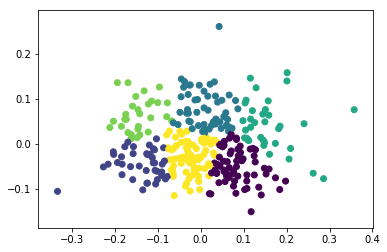

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


In [8]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
%timeit y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [10]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=6,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
%timeit predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

259 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4   5
row_0                        
0       9   0  22  20   0   3
1       0   0  32   0   5   4
2       0  26   0   0   0   0
3       0   8   0   0  24   1
4      45   0   0  15   0   0
5      12   7   0   0   0  70


**Complexity isn't really an issue. There is a noticeable difference in runtime with more clusters, but not enough to limit the number of clusters based on runtime.** 